# Our first Kaggle Competition.

For this assignment we are going to submit our first submission in Kaggle for the [the Titanic Dataset Competition](https://www.kaggle.com/c/titanic/data).

Kaggle is a website where data scientists can compete on Data Science competitions where the goal is to provide the best predictions for a specific dataset. Companies launch these competitions and usually give substantial rewards (in the order of thousands of dollars).

For the titanic competition, the dataset has passenger information for every passenger that was aboard the titanic on its first (and last trip). 

The target variable is whether the passenger died or not when the cruise ship sank
You can download the competition data (and check the data dictionary) on [kaggle](https://www.kaggle.com/c/titanic/data).

You will use the training data (file `train.csv`) to train your classifier, and will create submissions for the `test.csv`. 

Basically, you have to submit a csv file on the shape:

```
PassengerId,Survived
892,0
893,1
894,1
895,0
...
```

Where the PassengerId are the ids of the passengers on the `test.csv` dataset and `Survived` is your model prediction about the passenger (0, die, 1 survives).

In order to submit a file you have to create a profile on the website. Then you can upload the submission using the Website or using the [kaggle api](https://github.com/Kaggle/kaggle-api)

In [117]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10, 10]

In [118]:
train_titanic = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [119]:
train_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
train_titanic["Sex"] = train_titanic["Sex"].replace({"male":0, "female":1})

In [122]:
dummyembarked = pd.get_dummies(train_titanic["Embarked"])

In [123]:
train_titanic = pd.concat([train_titanic, dummyembarked], axis=1)

In [124]:
train_titanic["had_cabin"] = np.where((train_titanic["Cabin"]!=0), 1, 0)

In [125]:
train_titanic["child"] = np.where((train_titanic["Age"]>=0) & (train_titanic["Age"]<18), 1, 0)

In [126]:
train_titanic["adult"] = np.where((train_titanic["Age"]>=18), 1, 0)

In [127]:
train_titanic["Age"] = train_titanic["Age"].fillna(29)
train_titanic = train_titanic.fillna(0)

In [128]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,had_cabin,child,adult
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,0,0,1,1,0,1


In [129]:
independent_variables = train_titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare",
                                       "C", "Q", "S", "had_cabin", "child", "adult"]]

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [131]:
target = train_titanic["Survived"]

In [132]:
target.value_counts(True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [133]:
X = independent_variables
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [134]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

In [135]:
def tuple_class_prediction(y_true, y_pred):
    return list(zip(y_true, y_pred))

tuple_class_prediction(true_classes, predictions)[:10]

[(1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1)]

In [136]:
def TP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==1])

def TN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==0])
    
def FP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==1])

def FN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==0])


print("""
True Positives: {}
True Negatives: {}
False Positives: {}
False Negatives: {}
""".format(
    TP(true_classes, predictions),
    TN(true_classes, predictions),
    FP(true_classes, predictions),
    FN(true_classes, predictions)    
))    


True Positives: 81
True Negatives: 136
False Positives: 21
False Negatives: 30



In [137]:
def accuracy(true_classes, predictions):
    tp = TP(true_classes, predictions)
    tn = TN(true_classes, predictions)
    return (tp+tn) / len(true_classes)

accuracy(true_classes, predictions)

0.8097014925373134

In [138]:
def recall(true_classes, predictions):
    tp = TP(true_classes, predictions)
    fn = FN(true_classes, predictions)
    return tp / (tp+fn)

recall(true_classes, predictions)

0.7297297297297297

In [139]:
def precision(true_classes, predictions):
    tp = TP(true_classes, predictions)
    fp = FP(true_classes, predictions)
    return tp / (tp+fp)

precision(true_classes, predictions)

0.7941176470588235

In [140]:
def fpr(true_classes, predictions):
    return (FP(true_classes, predictions) / (
             FP(true_classes, predictions) + TN(true_classes, predictions)
             )
           )
fpr(true_classes, predictions)

0.1337579617834395

In [141]:
def probabilities_to_classes(prediction_probabilities, threshold=0.5):
    predictions = np.zeros([len(prediction_probabilities), ])
    predictions[prediction_probabilities[:,1]>=threshold] = 1
    return predictions

In [142]:
def evaluate_threshold(prediction_probabilities, threshold):
    threshold_predicted_classes = probabilities_to_classes(prediction_probabilities, threshold)
    threshold_recall = recall(true_classes, threshold_predicted_classes)
    threshold_fpr = fpr(true_classes, threshold_predicted_classes)
    threshold_precision = precision(true_classes, threshold_predicted_classes) 
    return threshold_precision, threshold_recall, threshold_fpr

In [143]:
threshold_range = np.linspace(0.001, 0.99, 1000)

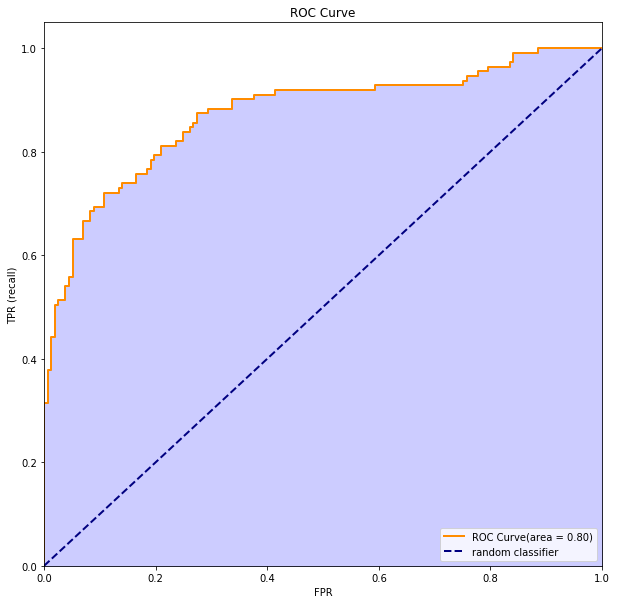

In [144]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC Curve(area = %0.2f)' % roc_auc)
    plt.fill_between(fpr, tpr, step='post', alpha=0.2,
                 color='b')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="random classifier")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show();

roc_curve(true_classes, predictions, prediction_probabilities)

In [145]:
def evaluate_model(true_classes, predictions):
    accuracy = metrics.accuracy_score(true_classes, predictions)
    precision = metrics.average_precision_score(true_classes, predictions)
    recall = metrics.recall_score(true_classes, predictions)
    auc = metrics.roc_auc_score(true_classes, predictions)
    f1 = metrics.f1_score(true_classes, predictions)
    print("""
    Accuracy: {:.3f}
    Precision: {:.3f}
    Recall: {:.3f}
    AUC: {:.3f}
    F1 Score: {:.3f}
    """.format(
        accuracy, 
        precision,
        recall,
        auc,
        f1
    ))
    
evaluate_model(true_classes, predictions)


    Accuracy: 0.810
    Precision: 0.691
    Recall: 0.730
    AUC: 0.798
    F1 Score: 0.761
    


In [146]:
prediction_probabilities[:10]

array([[0.91119204, 0.08880796],
       [0.7922759 , 0.2077241 ],
       [0.87906745, 0.12093255],
       [0.08220084, 0.91779916],
       [0.14280658, 0.85719342],
       [0.0901512 , 0.9098488 ],
       [0.35167929, 0.64832071],
       [0.83342995, 0.16657005],
       [0.11484846, 0.88515154],
       [0.12788363, 0.87211637]])

In [147]:
df = pd.DataFrame({"true_class":true_classes,
                   "pred_class": predictions,
                   "probabilities_0":model.predict_proba(X_test)[:,0],
                    "probabilities_1":model.predict_proba(X_test)[:,1],
                  })

df["sum_probas"] = df.probabilities_0 + df.probabilities_1

In [148]:
df.sample(10)

,true_class,pred_class,probabilities_0,probabilities_1,sum_probas
840,0,0,0.879067,0.120933,1.0
212,0,0,0.882887,0.117113,1.0
266,0,0,0.911839,0.088161,1.0
468,0,0,0.869154,0.130846,1.0
688,0,0,0.875445,0.124555,1.0
657,0,1,0.399813,0.600187,1.0
286,1,0,0.895543,0.104457,1.0
280,0,0,0.900722,0.099278,1.0
668,0,0,0.914923,0.085077,1.0
231,0,0,0.894502,0.105498,1.0


In [149]:
test["Survived"] = target

In [150]:
#test = test.drop(["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [151]:
test.sample(10)

,PassengerId,Survived
287,1179,0
191,1083,0
132,1024,0
237,1129,1
108,1000,0
345,1237,1
382,1274,0
282,1174,0
267,1159,1
122,1014,0


In [152]:
test.shape

(418, 2)

In [153]:
test.to_csv("data/test.csv", index=False)